In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [99]:
collisions = pd.read_csv('Los_Angeles_Collisions_2013through2018.csv',sep=',', 
                         dtype={"case_id": 'Int64', 'location_type': str, 'ramp_intersection': str, 'side_of_hwy': str,
                               'pcf_viol_category': str, 'not_private_property': str})

In [100]:
collisions.head()

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,...,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
0,-118.323902,34.047565,2001,5814841,2013,2013-03-04T00:00:00.000Z,1942,2013-01-22T00:00:00.000Z,840,36027.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.323902,34.047565,"PICO BLVD & NORTON AVE, LOS ANGELES, CA",PICO BLVD,NORTON AVE,99970.0
1,-118.246332,34.062645,2002,6392368,2014,2014-06-06T00:00:00.000Z,1942,2014-01-25T00:00:00.000Z,730,39341.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.246332,34.062645,"SUNSET BLVD & FIGUEROA ST, LOS ANGELES, CA",SUNSET BLVD,FIGUEROA ST,135877.0
2,-118.361432,34.062946,2003,6718345,2015,2015-03-16T00:00:00.000Z,1942,2015-01-17T00:00:00.000Z,715,40024.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.361432,34.062946,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",WILSHIRE BLVD,FAIRFAX AVE,130218.0
3,-118.453707,34.032356,2004,5968457,2013,2014-06-09T00:00:00.000Z,1942,2013-01-03T00:00:00.000Z,745,38310.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.453707,34.032356,"BUNDY DR & OLYMPIC BLVD, LOS ANGELES, CA",BUNDY DR,OLYMPIC BLVD,135334.0
4,-118.413943,34.221642,2005,6344888,2014,2014-06-05T00:00:00.000Z,1942,2014-01-10T00:00:00.000Z,745,39085.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.413943,34.221642,"ROSCOE BLVD & COLDWATER CANYON AVE, LOS ANGELE...",ROSCOE BLVD,COLDWATER CANYON AVE,150465.0


In [101]:
for col in collisions.columns:
    print(col)

X
Y
OBJECTID
case_id
accident_year
proc_date
juris
collision_date
collision_time
officer_id
reporting_district
day_of_week
chp_shift
population
cnty_city_loc
special_cond
beat_type
chp_beat_type
city_division_lapd
chp_beat_class
beat_number
primary_rd
secondary_rd
distance
direction
intersection
weather_1
weather_2
state_hwy_ind
caltrans_county
caltrans_district
state_route
route_suffix
postmile_prefix
postmile
location_type
ramp_intersection
side_of_hwy
tow_away
collision_severity
number_killed
number_injured
party_count
primary_coll_factor
pcf_code_of_viol
pcf_viol_category
pcf_violation
pcf_viol_subsection
hit_and_run
type_of_collision
mviw
ped_action
road_surface
road_cond_1
road_cond_2
lighting
control_device
chp_road_type
pedestrian_accident
bicycle_accident
motorcycle_accident
truck_accident
not_private_property
alcohol_involved
stwd_vehtype_at_fault
chp_vehtype_at_fault
count_severe_inj
count_visible_inj
count_complaint_pain
count_ped_killed
count_ped_injured
count_bicyclist_ki

In [102]:
address_group = collisions.groupby('match_addr')

In [103]:
collisions['match_addr'].value_counts()

MANCHESTER AVE & FIGUEROA ST, LOS ANGELES, CA          136
HIGHLAND AVE & FRANKLIN AVE, LOS ANGELES, CA           113
LA BREA AVE & RODEO RD, LOS ANGELES, CA                111
SHERMAN WAY & COLDWATER CANYON AVE, LOS ANGELES, CA    111
SHERMAN WAY & WOODMAN AVE, LOS ANGELES, CA             106
                                                      ... 
CHASE ST & TOPANGA CANYON BLVD, LOS ANGELES, CA          1
ROSCOE BLVD & CREBS AVE, LOS ANGELES, CA                 1
CAMERON LN & FLOWER ST, LOS ANGELES, CA                  1
ODELL AVE & APPERSON ST, LOS ANGELES, CA                 1
2800 VERMONT CANYON RD, LOS ANGELES, CA                  1
Name: match_addr, Length: 39367, dtype: int64

In [104]:
test = collisions[collisions['match_addr'] == 'MANCHESTER AVE & FIGUEROA ST, LOS ANGELES, CA']

In [105]:
test['pedestrian_accident'].value_counts()

Y    8
Name: pedestrian_accident, dtype: int64

In [106]:
years = [i for i in range(2013, 2019)]
print(years)

[2013, 2014, 2015, 2016, 2017, 2018]


In [107]:
for year in years:
    print(year)
    print(collisions[collisions.accident_year == year]['month_'].value_counts())

2013
10    2951
8     2882
3     2741
11    2727
5     2718
12    2705
9     2702
4     2699
7     2552
1     2457
6     2450
2     2244
Name: month_, dtype: int64
2014
10    3008
12    2860
8     2807
9     2798
11    2782
3     2744
7     2713
6     2706
5     2668
4     2602
1     2570
2     2428
Name: month_, dtype: int64
2015
8     3220
12    3106
3     3088
10    3032
7     3030
11    3018
5     2991
6     2941
4     2931
9     2912
1     2836
2     2754
Name: month_, dtype: int64
2016
8     3353
12    3347
10    3290
6     3274
9     3262
4     3178
3     3114
5     3093
7     3086
2     3085
11    2999
1     2810
Name: month_, dtype: int64
2017
10    3541
3     3432
11    3353
8     3345
5     3239
12    3230
7     3230
4     3165
6     3137
9     3070
1     3000
2     2891
Name: month_, dtype: int64
2018
10    3477
3     3425
8     3362
7     3310
11    3230
9     3183
4     3177
5     3129
1     3121
12    3110
6     3110
2     3036
Name: month_, dtype: int64


NameError: name 'AutoDateLocator' is not defined

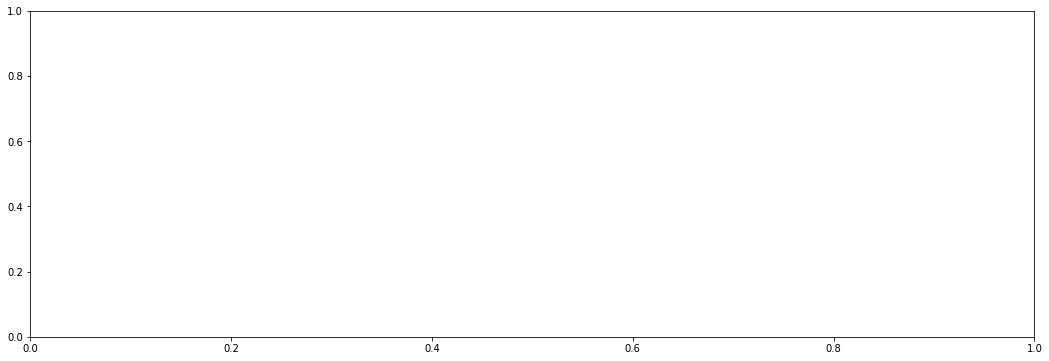

In [141]:
month_counts = collisions['month_'].value_counts()
month_counts


fig, ax = plt.subplots(figsize=(18,6))
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

plt.bar(collisions.month_.value_counts().index, collisions.month_.value_counts())

plt.title('Collisions per Month for 2013-2018')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.show()